In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Data
x1 = np.array([0.245, 0.247, 0.285, 0.299, 0.327, 0.347, 0.356, 0.36, 0.363, 0.364, 0.398, 0.4, 0.409, 0.421,
              0.432, 0.473, 0.509, 0.529, 0.561, 0.569, 0.594, 0.638, 0.656, 0.816, 0.853, 0.938, 1.036, 1.045])
x2 = np.square(x1) # Assume x2 = x1 ** 2
y = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Initialize params
np.random.seed(0)   # ensurred the same random numbers generated every time
theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()
alpha = 1e-4
lambda_ = 0.01
iterations = 10000

In [18]:
# Logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Predict function
def h(x1, x2, theta0, theta1, theta2):
    z = theta0 + theta1 * x1 + theta2 * x2
    return logistic_function(z)

# Updated cost_function
def cost_function(x1, x2, y, theta0, theta1, theta2, lambda_):
    m = len(y)
    epsilon = 1e-15  # Ensure log doesn't go to infinity
    predictions = h(x1, x2, theta0, theta1, theta2)
    regularization_term = (lambda_ / (2 * m)) * (np.square(theta1) + np.square(theta2))
    cost = (-1/m) * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions))
    return cost + regularization_term

# Updated gradient descent
def gradient_descent(x1, x2, y, theta0, theta1, theta2, alpha, lambda_, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        grad0 = (1/m) * np.sum(h(x1, x2, theta0, theta1, theta2) - y)
        grad1 = (1/m) * np.sum((h(x1, x2, theta0, theta1, theta2) - y) * x1)
        grad1 = (1/m) * np.sum((h(x1, x2, theta0, theta1, theta2) - y) * x2)
        theta0 = theta0 - alpha * grad0
        theta1 = theta1 - alpha * (grad1 + lambda_ * theta1)
        theta2 = theta2 - alpha * (grad1 + lambda_ * theta2)  

        cost = cost_function(x1, x2, y, theta0, theta1, theta2, lambda_)
        cost_history.append(cost)
    return theta0, theta1, theta2, cost_history

In [19]:
# Plot final results
def plot_final_result(x1, x2, y, theta0, theta1, theta2, cost, iterations):
    plt.close('all')
    fig, ax = plt.subplots()
    plt.xlabel('Grain size (x1)')
    plt.ylabel('Spider appearance')

    # Plot the original data points
    ax.scatter(x1, y, color="blue", label="Data")

    # Plot the final prediction line based on theta0, theta1, and theta2
    line = h(x1, x2, theta0, theta1, theta2)
    ax.plot(x1, line, color="red", label="Prediction")

    ax.legend()

    # Add text information about the cost and theta values
    plt.figtext(0.3, 1.07, f"Iteration: {iterations}, Cost: {cost:.4f}", transform=ax.transAxes)
    plt.figtext(0.3, 1.02, f"Theta0: {theta0:.4f}, Theta1: {theta1:.4f}, Theta2: {theta2:.4f}", transform=ax.transAxes)

    plt.show()

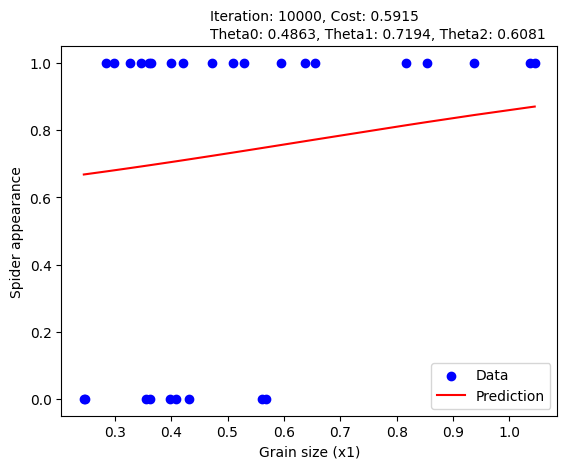

In [24]:
theta0, theta1,theta2, cost_history = gradient_descent(x1, x2, y, theta0, theta1, theta2, alpha, lambda_, iterations)
plot_final_result(x1,x2, y, theta0, theta1, theta2, cost_history[-1], iterations)